In [7]:
# prompt: download tensorflow and run

!pip install tensorflow

In [14]:
# Import Necessary Libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [15]:
# Load the MNIST datasets
(train_imgs, train_labels), (test_img, test_labels) = datasets.mnist.load_data()

In [16]:
# Preprocessing: Normalize the pixel values to be b/w 0, 1
train_imgs, test_img = train_imgs / 255.0, test_img / 255.0

In [17]:
# Reshape the Images to (28, 28, 1) as they are grayscale
train_imgs = train_imgs.reshape((train_imgs.shape[0], 28, 28, 1))
test_img = test_img.reshape((test_img.shape[0], 28, 28, 1))

In [18]:
# Convert the labels to one-hot encoded format
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [19]:
# Build the CNN model
model = models.Sequential()

# First convolutional layer
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))

# Second convlutional layer
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Third convolutional layer
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
# Flatten the 3d output to 1d and add dense layer
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))

# Output layer with 10 neurons (for 10 digit classes)
model.add(layers.Dense(10, activation='softmax'))

In [22]:
# Model Compilation
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [23]:
# Train the Model
model.fit(train_imgs, train_labels, epochs=5, batch_size=64, validation_data=(test_img, test_labels), validation_split=0.1)

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 51s 52ms/step - accuracy: 0.8587 - loss: 0.4608 - val_accuracy: 0.9856 - val_loss: 0.0485
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 80s 50ms/step - accuracy: 0.9808 - loss: 0.0594 - val_accuracy: 0.9876 - val_loss: 0.0378
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 48s 51ms/step - accuracy: 0.9879 - loss: 0.0373 - val_accuracy: 0.9847 - val_loss: 0.0487
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 46s 49ms/step - accuracy: 0.9907 - loss: 0.0292 - val_accuracy: 0.9853 - val_loss: 0.0495
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 48s 51ms/step - accuracy: 0.9920 - loss: 0.0239 - val_accuracy: 0.9918 - val_loss: 0.0257


In [24]:
# Evaluation of the model in test data
test_loss, test_acc = model.evaluate(test_img, test_labels)
print(f"Test accuracy: {test_acc * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9896 - loss: 0.0325
Test accuracy: 99.18%


In [26]:
# Prediction on test image
predictions = model.predict(test_img)
print("Prediction:", np.argmax(predictions[0]))
print("Actual:", np.argmax(test_labels[0]))

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step
Prediction: 7
Actual: 7


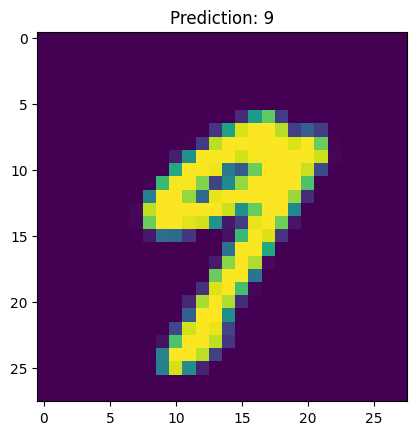

In [39]:
plt.imshow(test_img[20].reshape(28, 28))
plt.title(f"Prediction: {np.argmax(predictions[20])}")
plt.show()